In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Python file/Autoencoder_CNN/mixed_data_2.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall("/content/drive/My Drive/Python file/Autoencoder_CNN")
  print('Done')

Done


In [ ]:
!pip install -q keras

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6480093400435710482]

In [ ]:
import numpy as np 
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from keras.layers import LeakyReLU
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import math
import pandas as pd
import datetime
import time
import csv
import numpy as np

from sklearn.model_selection import train_test_split

import os
from PIL import Image
import sys


In [ ]:
def images_max_size(pathd):
    w_max = 0
    h_max = 0
    image_dir=Path(pathd)
    Alldatas=[]
    img_data=[]
    for i in  image_dir.iterdir():
        #print(i)
        img_data.append(i)
     
    for i in img_data:
        img=load_img(i)
        x=img_to_array(img)
        h,w=x.shape[:2]
        h_max=max(h_max,h)
        w_max=max(w_max,w)
        #print(h,w)
    return (h_max,w_max)

import cv2
#fig=plt.figure(figsize=(50,50))
height_max,width_max=images_max_size("/content/drive/MyDrive/Python file/Autoencoder_CNN/mixed_data_2/train")
#height_max,width_max=(420,540)
print(height_max,width_max)



420 540


In [ ]:
#from PIL import Image, ImageOps
white = [255,255,255]
def getData(pathd,scale):
    image_dir=Path(pathd)
    Alldatas=[]
    img_data=[]
    for i in  image_dir.iterdir():
        #print(i)
        img_data.append(i)
     
    for i in img_data:
        img=load_img(i)
        x=img_to_array(img)
        #print(x.shape)
        h, w = x.shape[:2]
        h=min(h,height_max)
        w=min(w,width_max)
        diff_vert = scale[0] - h
        pad_top = diff_vert//2
        pad_bottom = diff_vert - pad_top
        diff_hori = scale[1] - w
        pad_left = diff_hori//2
        pad_right = diff_hori - pad_left
        x=cv2.copyMakeBorder(x, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=white)
        #assert x.shape[:2] == scale 
        #padding = (pad_left, pad_top, pad_right, pad_bottom)
        #x=ImageOps.expand(x, padding)
        #print(x.shape)
        #print("-----------------",x)
        #x=tf.image.rgb_to_grayscale(x)
        Alldatas.append(x)
    return Alldatas

In [ ]:
scale=(height_max,width_max)
all_img=getData("/content/drive/MyDrive/Python file/Autoencoder_CNN/mixed_data_2/train",scale)
all_img_y=getData("/content/drive/MyDrive/Python file/Autoencoder_CNN/mixed_data_2/train_cleaned",scale)
#%%
all_img=tf.image.rgb_to_grayscale(all_img)
all_img_y=tf.image.rgb_to_grayscale(all_img_y)

In [ ]:
def prepare(arr):
    arr=np.asarray(arr,dtype="float32")
    arr2=arr/255.0
    return arr2

In [ ]:
# EDIT DATASET AND RESHAPE
train = prepare(all_img)
train_y = prepare(all_img_y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,train_y,test_size=0.1,random_state=42)

In [ ]:
from keras.layers import Activation
#from keras.layers.normalization import BatchNormalization
from keras import optimizers

opt = optimizers.RMSprop(learning_rate=0.001)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',strides=1, input_shape=(width_max,height_max,1),data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same',strides=1, input_shape=(width_max,height_max,1),data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same',strides=1,data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same',strides=1,data_format="channels_last"))
model.add(LeakyReLU(alpha=0.05))
model.add(UpSampling2D((2, 2))) 

model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same',strides=1,data_format="channels_last"))

model.compile(loss="mean_squared_error",optimizer=opt,metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 540, 420, 64)      640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 540, 420, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 540, 420, 64)      36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 540, 420, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 270, 210, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 270, 210, 64)      36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 270, 210, 64)      0

In [ ]:
print(len(x_train),len(x_test))
print(len(y_train),len(y_test))

225 25
225 25


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/My Drive/Python file/Autoencoder_CNN/model_pc1_2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

history = model.fit(x_train,y_train,callbacks=callbacks,epochs = 100,batch_size = 8,validation_data = (x_test,y_test))

Epoch 1/100
29/29 [==============================] - 664s 23s/step - loss: 0.0908 - accuracy: 2.0280e-04 - val_loss: 0.1205 - val_accuracy: 0.0095

Epoch 00001: val_loss improved from inf to 0.12049, saving model to /content/drive/My Drive/Python file/Autoencoder_CNN/model_pc1_2.h5
Epoch 2/100
29/29 [==============================] - 637s 22s/step - loss: 0.0733 - accuracy: 0.0029 - val_loss: 0.0336 - val_accuracy: 0.0119

Epoch 00002: val_loss improved from 0.12049 to 0.03360, saving model to /content/drive/My Drive/Python file/Autoencoder_CNN/model_pc1_2.h5
Epoch 3/100
29/29 [==============================] - 638s 22s/step - loss: 0.0444 - accuracy: 0.0129 - val_loss: 0.0324 - val_accuracy: 0.0106

Epoch 00003: val_loss improved from 0.03360 to 0.03240, saving model to /content/drive/My Drive/Python file/Autoencoder_CNN/model_pc1_2.h5
Epoch 4/100
29/29 [==============================] - 621s 21s/step - loss: 0.0249 - accuracy: 0.0221 - val_loss: 0.0172 - val_accuracy: 0.0222

Epoch 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


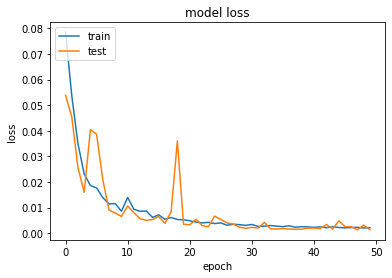

In [ ]:
print(history.history.keys())


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
